In [ ]:
import math
from scipy.io import arff
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np

from random import randint
from random import random
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
#from matplotlib import pyplot

# Formatação mais bonita para os notebooks
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-e0e336b3f09b>:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


# New section

In [ ]:
#def load_dataset():
df_nasa93 = pd.read_csv('nasa93.csv',  header=0)
df_nasa93.head(10)

,recordnumber,projectname,cat2,forg,center,year,mode,rely,data,cplx,...,acap,aexp,pcap,vexp,lexp,modp,tool,sced,equivphyskloc,act_effort
0,1,de,avionicsmonitoring,g,2,1979,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,25.9,117.6
1,2,de,avionicsmonitoring,g,2,1979,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,24.6,117.6
2,3,de,avionicsmonitoring,g,2,1979,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,7.7,31.2
3,4,de,avionicsmonitoring,g,2,1979,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,8.2,36.0
4,5,de,avionicsmonitoring,g,2,1979,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,9.7,25.2
5,6,de,avionicsmonitoring,g,2,1979,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,2.2,8.4
6,7,de,avionicsmonitoring,g,2,1979,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,3.5,10.8
7,8,erb,avionicsmonitoring,g,2,1982,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,66.6,352.8
8,9,gal,missionplanning,g,1,1980,semidetached,h,l,h,...,h,h,h,n,h,h,h,n,7.5,72.0
9,10,gal,missionplanning,g,1,1980,semidetached,n,l,h,...,h,vh,vh,n,h,n,n,n,20.0,72.0


In [ ]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(df_nasa93)
categorical_columns

['projectname',
 'cat2',
 'forg',
 'mode',
 'rely',
 'data',
 'cplx',
 'time',
 'stor',
 'virt',
 'turn',
 'acap',
 'aexp',
 'pcap',
 'vexp',
 'lexp',
 'modp',
 'tool',
 'sced']

In [ ]:
COL_LIST = ["projectname", "cat2", "forg", "center","year","mode","recordnumber"]
df1 = df_nasa93.drop(COL_LIST,axis=1)
#df.columns()
data = df1.values
X, y = data[:, :-1], data[:, -1]
df1.head(10)

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,equivphyskloc,act_effort
0,h,l,h,n,n,l,l,n,n,n,n,h,h,n,l,25.9,117.6
1,h,l,h,n,n,l,l,n,n,n,n,h,h,n,l,24.6,117.6
2,h,l,h,n,n,l,l,n,n,n,n,h,h,n,l,7.7,31.2
3,h,l,h,n,n,l,l,n,n,n,n,h,h,n,l,8.2,36.0
4,h,l,h,n,n,l,l,n,n,n,n,h,h,n,l,9.7,25.2
5,h,l,h,n,n,l,l,n,n,n,n,h,h,n,l,2.2,8.4
6,h,l,h,n,n,l,l,n,n,n,n,h,h,n,l,3.5,10.8
7,h,l,h,n,n,l,l,n,n,n,n,h,h,n,l,66.6,352.8
8,h,l,h,xh,xh,l,h,h,h,h,n,h,h,h,n,7.5,72.0
9,n,l,h,n,n,l,l,h,vh,vh,n,h,n,n,n,20.0,72.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

nasa93 = df1[["rely","data","cplx","time","stor","virt","turn","acap","aexp",
              "pcap","vexp","lexp","modp","tool","sced", "equivphyskloc",	"act_effort"]]

encoder = OrdinalEncoder()
nasa93_encoded = encoder.fit_transform(nasa93)
nasa93_encoded

array([[ 0.,  1.,  0., ...,  1., 31., 22.],
       [ 0.,  1.,  0., ...,  1., 30., 22.],
       [ 0.,  1.,  0., ...,  1., 10.,  6.],
       ...,
       [ 0.,  2.,  3., ...,  0., 24., 47.],
       [ 0.,  2.,  3., ...,  0.,  6.,  2.],
       [ 0.,  2.,  3., ...,  0.,  2.,  8.]])

In [ ]:
encoder.categories_

[array(['h', 'l', 'n', 'vh'], dtype=object),
 array(['h', 'l', 'n', 'vh'], dtype=object),
 array(['h', 'l', 'n', 'vh', 'xh'], dtype=object),
 array(['h', 'n', 'vh', 'xh'], dtype=object),
 array(['h', 'n', 'vh', 'xh'], dtype=object),
 array(['h', 'l', 'n'], dtype=object),
 array(['h', 'l', 'n', 'vh'], dtype=object),
 array(['h', 'n', 'vh'], dtype=object),
 array(['h', 'l', 'n', 'vh'], dtype=object),
 array(['h', 'n', 'vh'], dtype=object),
 array(['h', 'l', 'n', 'vl'], dtype=object),
 array(['h', 'l', 'n', 'vl'], dtype=object),
 array(['h', 'l', 'n', 'vh', 'vl'], dtype=object),
 array(['h', 'l', 'n', 'vh', 'vl'], dtype=object),
 array(['h', 'l', 'n'], dtype=object),
 array([9.000e-01, 2.200e+00, 3.000e+00, 3.500e+00, 5.500e+00, 6.000e+00,
        6.200e+00, 6.500e+00, 7.250e+00, 7.500e+00, 7.700e+00, 8.000e+00,
        8.200e+00, 9.700e+00, 1.000e+01, 1.040e+01, 1.130e+01, 1.140e+01,
        1.280e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.540e+01, 1.600e+01,
        1.630e+01, 1.930e+01, 1

In [ ]:
data_encoded = encoder.fit_transform(nasa93)
data_encoded[:5]

array([[ 0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  0.,  0.,
         2.,  1., 31., 22.],
       [ 0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  0.,  0.,
         2.,  1., 30., 22.],
       [ 0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  0.,  0.,
         2.,  1., 10.,  6.],
       [ 0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  0.,  0.,
         2.,  1., 12.,  7.],
       [ 0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  0.,  0.,
         2.,  1., 13.,  5.]])

In [ ]:
columns_encoded = encoder.get_feature_names_out(nasa93.columns)
nasa_93 = pd.DataFrame(data_encoded, columns=columns_encoded)
#pd.DataFrame(data_encoded, columns=columns_encoded).head()
nasa_93.head(10)

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,equivphyskloc,act_effort
0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,31.0,22.0
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,30.0,22.0
2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,10.0,6.0
3,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,12.0,7.0
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,13.0,5.0
5,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0
6,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,3.0,1.0
7,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,48.0,37.0
8,0.0,1.0,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,9.0,15.0
9,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,2.0,0.0,2.0,2.0,2.0,27.0,15.0


In [ ]:
nasa_93.corr()

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,equivphyskloc,act_effort
rely,1.000000,-0.148089,0.060362,0.351873,0.258990,0.340290,0.119315,-0.203907,-0.189960,-0.141314,-0.086655,-0.078659,0.309948,-0.096621,-0.073003,0.172147,0.147916
data,-0.148089,1.000000,-0.056043,-0.262069,-0.128951,-0.166059,-0.099424,0.368133,-0.083468,0.138749,-0.090828,0.057205,0.483661,0.242717,0.084601,-0.136295,-0.181569
cplx,0.060362,-0.056043,1.000000,0.192573,0.203319,-0.044516,0.238752,-0.210561,-0.020683,-0.008092,-0.339143,0.107158,-0.119984,-0.210878,-0.345378,0.218358,0.436956
time,0.351873,-0.262069,0.192573,1.000000,0.739577,0.119730,-0.228141,0.125143,-0.089825,-0.112993,-0.103215,-0.126674,0.041985,-0.018875,-0.493431,-0.090414,0.179952
stor,0.258990,-0.128951,0.203319,0.739577,1.000000,-0.022821,0.029780,0.061174,-0.191286,-0.104578,-0.217339,-0.073956,0.094930,-0.147524,-0.252271,-0.015220,0.177301
virt,0.340290,-0.166059,-0.044516,0.119730,-0.022821,1.000000,0.326939,0.012019,-0.107804,-0.118346,0.062601,0.045628,-0.152005,-0.082581,-0.085242,-0.031222,0.050640
turn,0.119315,-0.099424,0.238752,-0.228141,0.029780,0.326939,1.000000,-0.231538,0.063717,-0.062744,-0.209591,0.117474,-0.298778,-0.263057,0.056005,0.198181,0.142061
acap,-0.203907,0.368133,-0.210561,0.125143,0.061174,0.012019,-0.231538,1.000000,0.180393,0.439825,0.250747,0.216065,0.161230,0.170274,0.067511,-0.349466,-0.277975
aexp,-0.189960,-0.083468,-0.020683,-0.089825,-0.191286,-0.107804,0.063717,0.180393,1.000000,0.559101,0.329040,0.082674,-0.151988,0.058144,0.100087,-0.245887,-0.194855
pcap,-0.141314,0.138749,-0.008092,-0.112993,-0.104578,-0.118346,-0.062744,0.439825,0.559101,1.000000,0.259302,0.206884,-0.103270,-0.009935,0.054731,-0.113571,-0.089842


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def load_dataset():
#preprocessing
 features = [ 'rely',	'data',	'cplx',	'time',	'stor',	'virt',	'turn',	'acap',	'aexp',	'pcap',	'vexp',	'lexp',	'modp',	'tool',	'sced',	'equivphyskloc',	'act_effort']
 max_corr_features = ['rely',	'data',	'cplx',	'time',	'stor',	'virt',	'turn',	'acap',	'aexp',	'pcap',	'vexp',	'lexp',	'modp',	'tool',	'sced',	'equivphyskloc']

 X = nasa_93[max_corr_features]
 y = nasa_93['act_effort']

# normalize the target
 scaler = MinMaxScaler()
 y = y.values.reshape((len(y), 1))
 y = scaler.fit_transform(y)
 return X, y
 y.head(10)

In [ ]:
# evaluate a set of predictions
def evaluate_predictions(y_test, yhat):
	return mean_absolute_error(y_test, yhat)

# create a random set of predictions
def random_predictions(n_examples):
	return [random() for _ in range(n_examples)]

# modify the current set of predictions
def modify_predictions(current, n_changes=1):
	# copy current solution
	updated = current.copy()
	for i in range(n_changes):
		# select a point to change
		ix = randint(0, len(updated)-1)
		# flip the class label
		updated[ix] = random()
	return updated

# run a hill climb for a set of predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error
def hill_climb_testset(X_test, y_test, max_iterations):
	scores = list()
	# generate the initial solution
	solution = random_predictions(X_test.shape[0])
	# evaluate the initial solution
	score = evaluate_predictions(y_test, solution)
	print('>%.3f' % score)
	# hill climb to a solution
	for i in range(max_iterations):
		# record scores
		scores.append(score)
		# stop once we achieve the best score
		if score == 0.0:
			break
		# generate new candidate
		candidate = modify_predictions(solution)
		# evaluate candidate
		value = evaluate_predictions(y_test, candidate)
		# check if it is as good or better
		if value <= score:
			solution, score = candidate, value
			print('>%d, score=%.3f' % (i, score))
	return solution, scores

(62, 16) (31, 16) (62, 1) (31, 1)
>0.325
>0, score=0.308
>1, score=0.303
>2, score=0.298
>3, score=0.289
>5, score=0.280
>7, score=0.280
>11, score=0.275
>12, score=0.273
>13, score=0.269
>16, score=0.265
>18, score=0.263
>19, score=0.263
>24, score=0.259
>25, score=0.244
>30, score=0.242
>33, score=0.232
>40, score=0.215
>47, score=0.214
>50, score=0.213
>51, score=0.210
>52, score=0.193
>56, score=0.187
>60, score=0.181
>64, score=0.176
>66, score=0.160
>69, score=0.160
>70, score=0.156
>72, score=0.142
>77, score=0.137
>79, score=0.133
>80, score=0.112
>81, score=0.099
>83, score=0.095
>88, score=0.094
>106, score=0.085
>114, score=0.084
>120, score=0.078
>123, score=0.075
>125, score=0.075
>136, score=0.074
>147, score=0.071
>163, score=0.060
>169, score=0.060
>181, score=0.057
>189, score=0.050
>211, score=0.049
>215, score=0.047
>248, score=0.047
>266, score=0.046
>294, score=0.046
>297, score=0.042
>298, score=0.036
>330, score=0.035
>343, score=0.034
>348, score=0.032
>360, sco

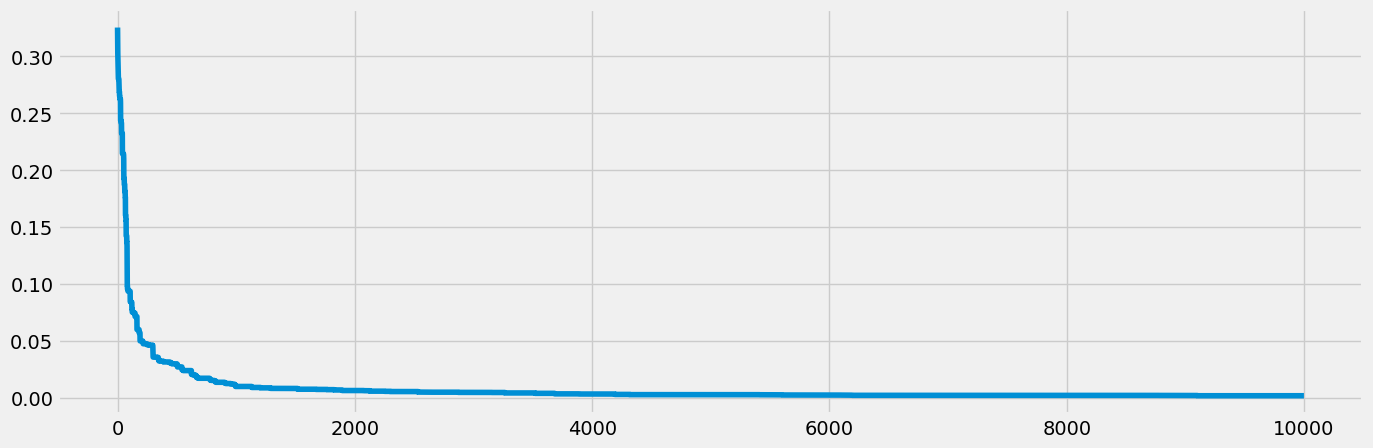

Mean Magnitude of Relative Error: 0.1839636276948374
Median Magnitude of Relative Error: 0.14990401325775116
R squared :  99.99294473838401
Mean square error:  0.000584392240304164
Root mean square error:  0.24174206094599343
Mean magnitude of percentage error : 0.8841567842637248


In [ ]:
# load the dataset
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
X, y = load_dataset()
#print(X.shape, y.shape)
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# run hill climb
yhat, scores = hill_climb_testset(X_test, y_test, 10000)
# plot the scores vs iterations
pyplot.plot(scores)
pyplot.show()
#print('Test Accuracy: %.5f' % (scores))
from sklearn.metrics import r2_score
r2 = r2_score(y_test,yhat) * 100
relative_error = np.abs((y_test - yhat) / y_test)
mean_relative_error = mean_absolute_error(y_test, yhat)
median_relative_error = median_absolute_error(y_test, yhat)
#print("Relative Error:", relative_error)
print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
print("R squared : " ,r2_score(y_test,yhat) * 100)
print("Mean square error: ", mean_squared_error(y_test, yhat) * 100)
print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, yhat)) * 100)
#print("Mean Absolute error : ", mean_absolute_error(y_test, yhat) * 100)
print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, yhat) * 100)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train)
predict = neigh.predict(X_test)
pyplot.show()
#print(neigh.score(X_test, y_test))
relative_error = np.abs((y_test - predict) / y_test)
mean_relative_error = mean_absolute_error(y_test, predict)
median_relative_error = median_absolute_error(y_test, predict)
#print("Relative Error:", relative_error)
print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
print("R squared : " ,r2_score(y_test,predict) * 100)
print("Mean square error: ", mean_squared_error(y_test, predict) * 100)
print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, predict)) * 100)
#print("Mean Absolute error : ", mean_absolute_error(y_test, predict) * 100)
print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, predict) * 100)

Mean Magnitude of Relative Error: 13.772278686109882
Median Magnitude of Relative Error: 0.09587397058291591
R squared :  49.8773610358042
Mean square error:  4.1516931431519275
Root mean square error:  20.37570402011162
Mean magnitude of percentage error : 41.52061377867807


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predict = regressor.predict(X_test)
#print(regressor.score(X_test, y_test))
relative_error = np.abs((y_test - predict) / y_test)
mean_relative_error = mean_absolute_error(y_test, predict)
median_relative_error = median_absolute_error(y_test, predict)
#print("Relative Error:", relative_error)
print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
print("R squared : " ,r2_score(y_test,predict) * 100)
print("Mean square error: ", mean_squared_error(y_test, predict) * 100)
print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, predict)) * 100)
#print("Mean Absolute error : ", mean_absolute_error(y_test, predict) * 100)
print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, predict) * 100)

Mean Magnitude of Relative Error: 14.098505809236697
Median Magnitude of Relative Error: 0.09587397058291591
R squared :  55.555294690884935
Mean square error:  3.681385938459268
Root mean square error:  19.186938105021518
Mean magnitude of percentage error : 47.73974291823801


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
for i in np.arange(100,1100,100):
    regressor1 = RandomForestRegressor(n_estimators=i,max_features=5)
    regressor1.fit(X_train, y_train)
    predict = regressor1.predict(X_test)
    #print(regressor1.score(X_test, y_test))
    relative_error = np.abs((y_test - predict) / y_test)
    mean_relative_error = mean_absolute_error(y_test, predict)
    median_relative_error = median_absolute_error(y_test, predict)
    #print("Relative Error:", relative_error)
    print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
    print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
    print("R squared : " ,r2_score(y_test,predict) * 100)
    print("Mean square error: ", mean_squared_error(y_test, predict) * 100)
    print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, predict)) * 100)
    #print("Mean Absolute error : ", mean_absolute_error(y_test, predict) * 100)
    print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, predict) * 100)

Mean Magnitude of Relative Error: 12.197643246428038
Median Magnitude of Relative Error: 0.09587397058291591
R squared :  65.37383516186406
Mean square error:  2.8681093833632283
Root mean square error:  16.935493448267835
Mean magnitude of percentage error : 41.552103097107214
Mean Magnitude of Relative Error: 12.017878711360813
Median Magnitude of Relative Error: 0.09587397058291591
R squared :  66.20940557261335
Mean square error:  2.7988985034770657
Root mean square error:  16.729908856527178
Mean magnitude of percentage error : 39.82612252442746
Mean Magnitude of Relative Error: 11.72558971445405
Median Magnitude of Relative Error: 0.09587397058291591
R squared :  65.4849462962137
Mean square error:  2.858905970611223
Root mean square error:  16.90829965020499
Mean magnitude of percentage error : 37.49791674750802
Mean Magnitude of Relative Error: 11.767439976432446
Median Magnitude of Relative Error: 0.09587397058291591
R squared :  65.13613506076037
Mean square error:  2.8877982

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma':('auto', 'scale')}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters, cv=3)
LinearSVC.fit(X_train, y_train)
predict = LinearSVC.predict(X_test)
#print(LinearSVC.score(X_test, y_test))
relative_error = np.abs((y_test - predict) / y_test)
mean_relative_error = mean_absolute_error(y_test, predict)
median_relative_error = median_absolute_error(y_test, predict)
#print("Relative Error:", relative_error)
print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
print("R squared : " ,r2_score(y_test,predict) * 100)
print("Mean square error: ", mean_squared_error(y_test, predict) * 100)
print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, predict)) * 100)
#print("Mean Absolute error : ", mean_absolute_error(y_test, predict) * 100)
print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, predict) * 100)

Mean Magnitude of Relative Error: 9.858277605845677
Median Magnitude of Relative Error: 26.048283219166407
R squared :  52.312437175045076
Mean square error:  2.5188743271850536
Root mean square error:  15.870961934252925
Mean magnitude of percentage error : 30.70800498818923


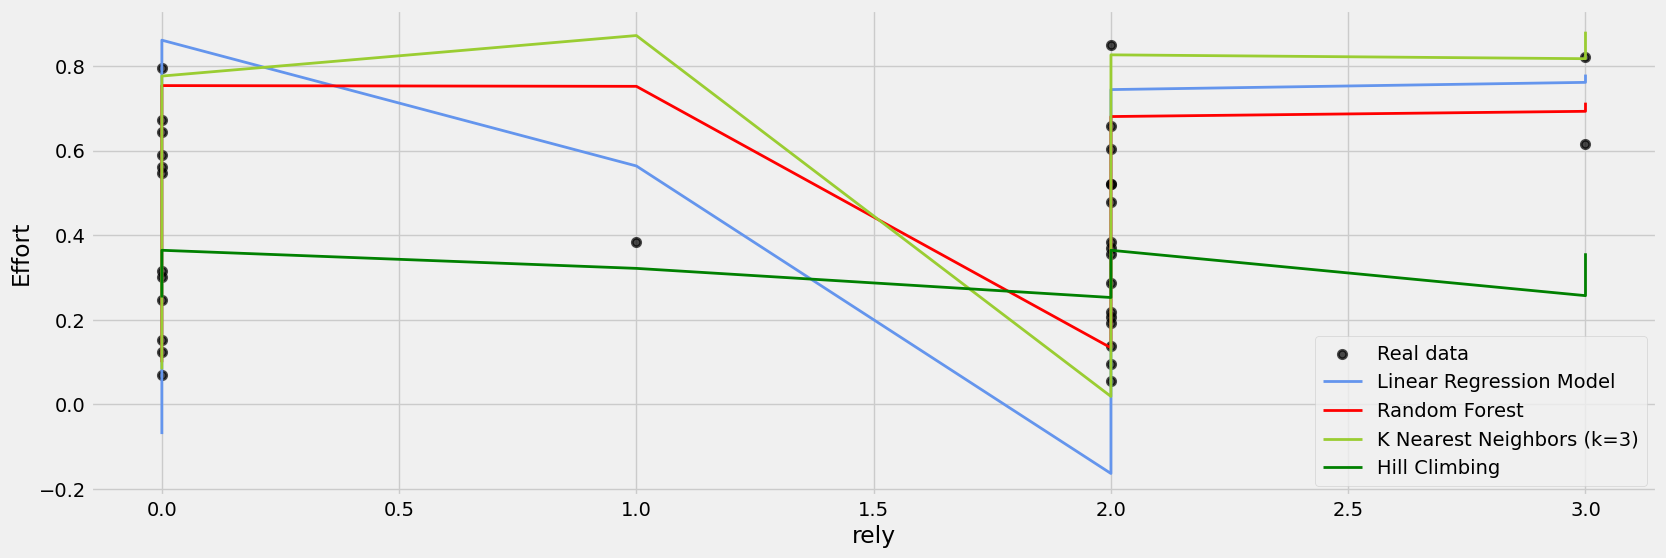

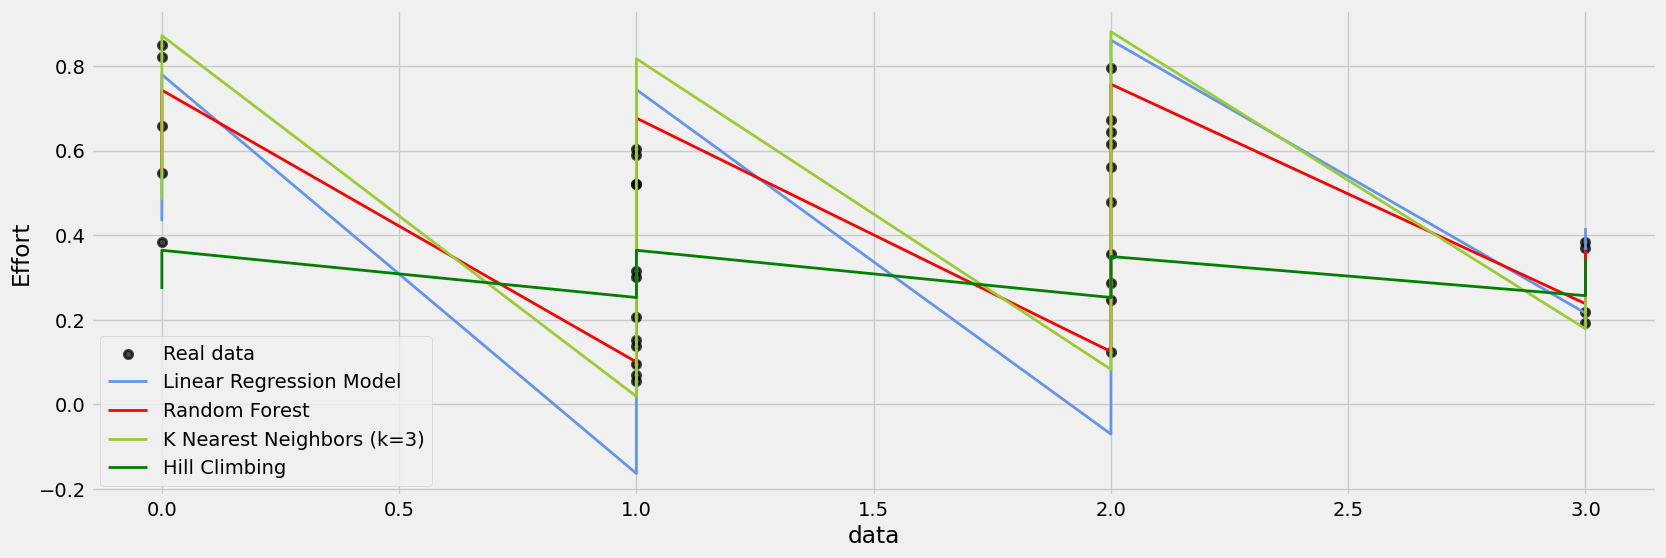

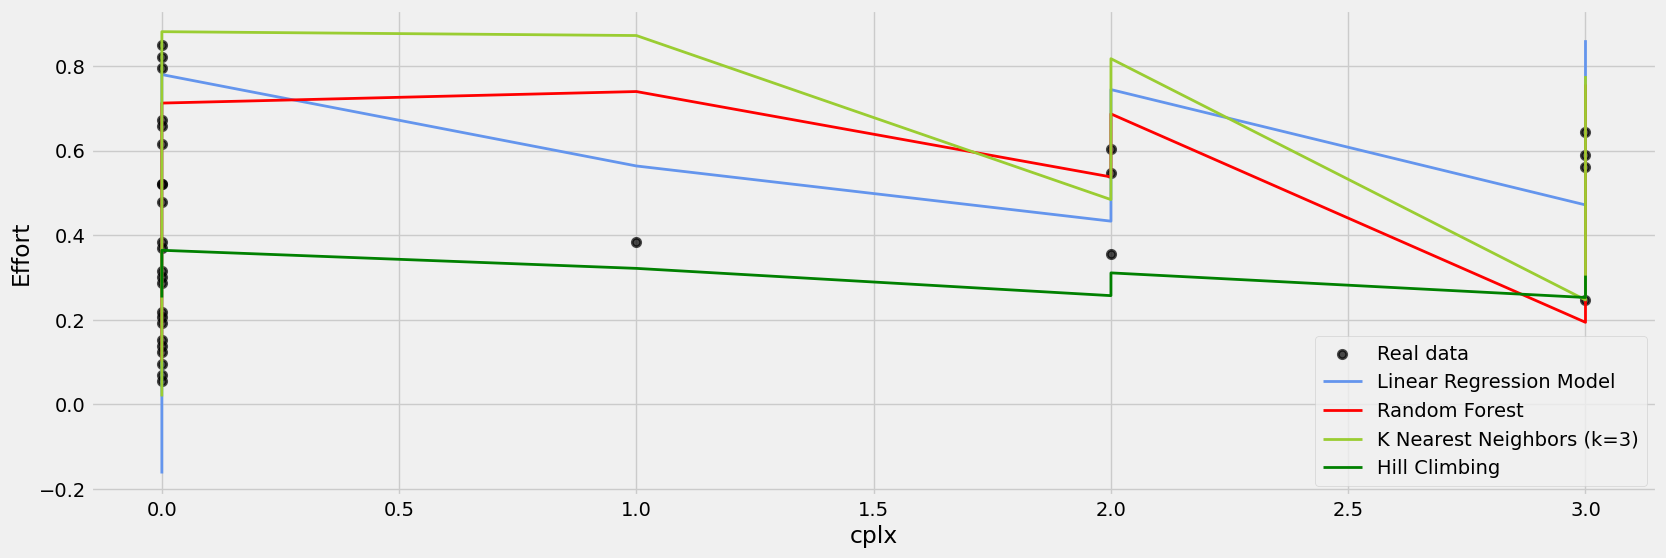

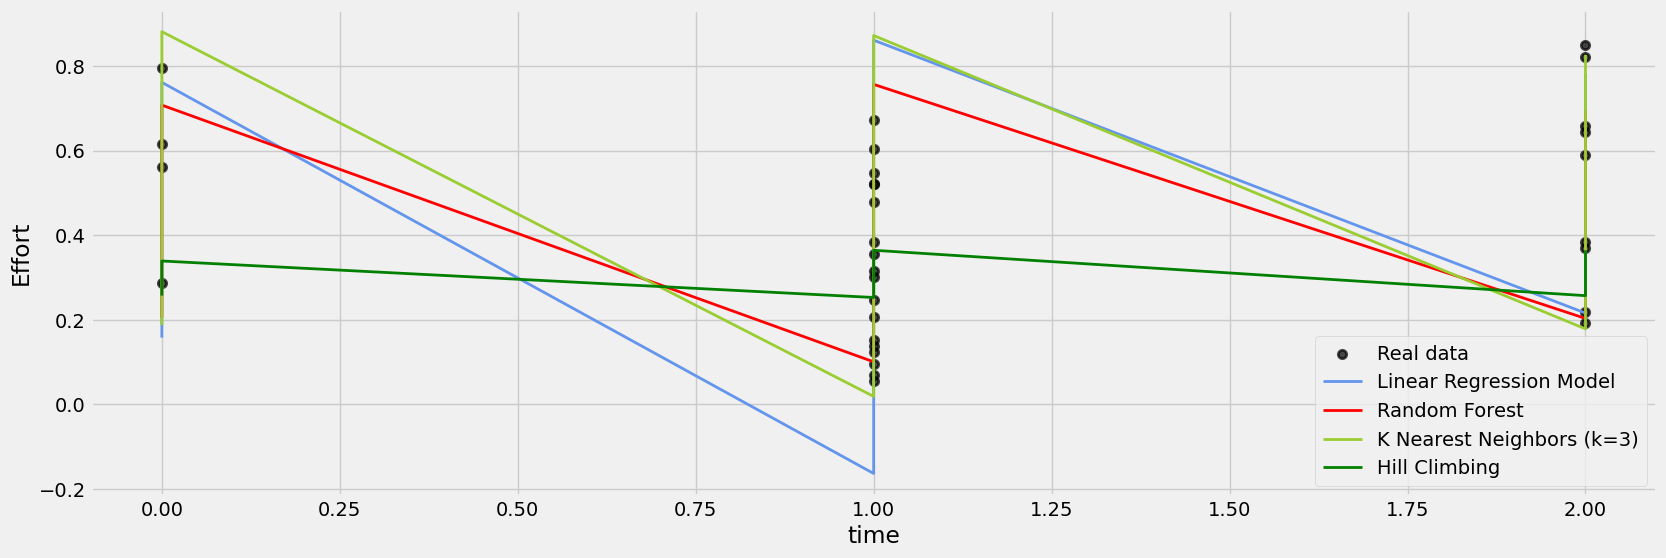

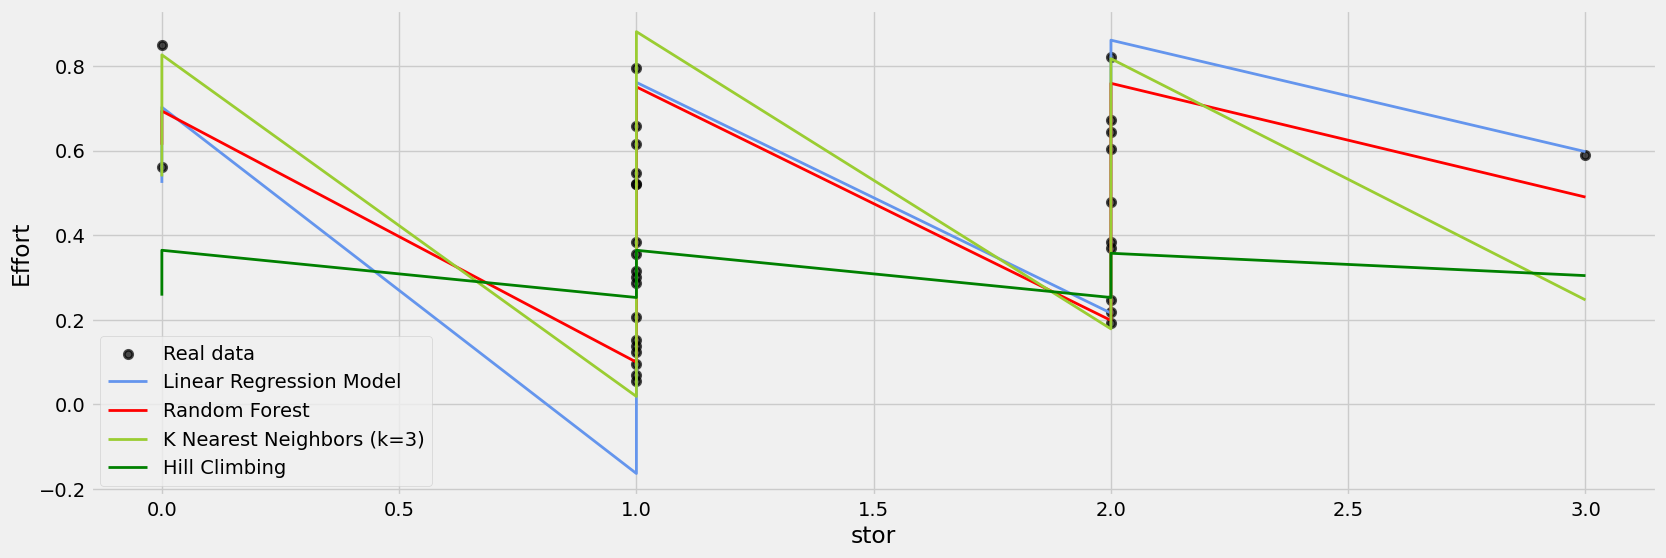

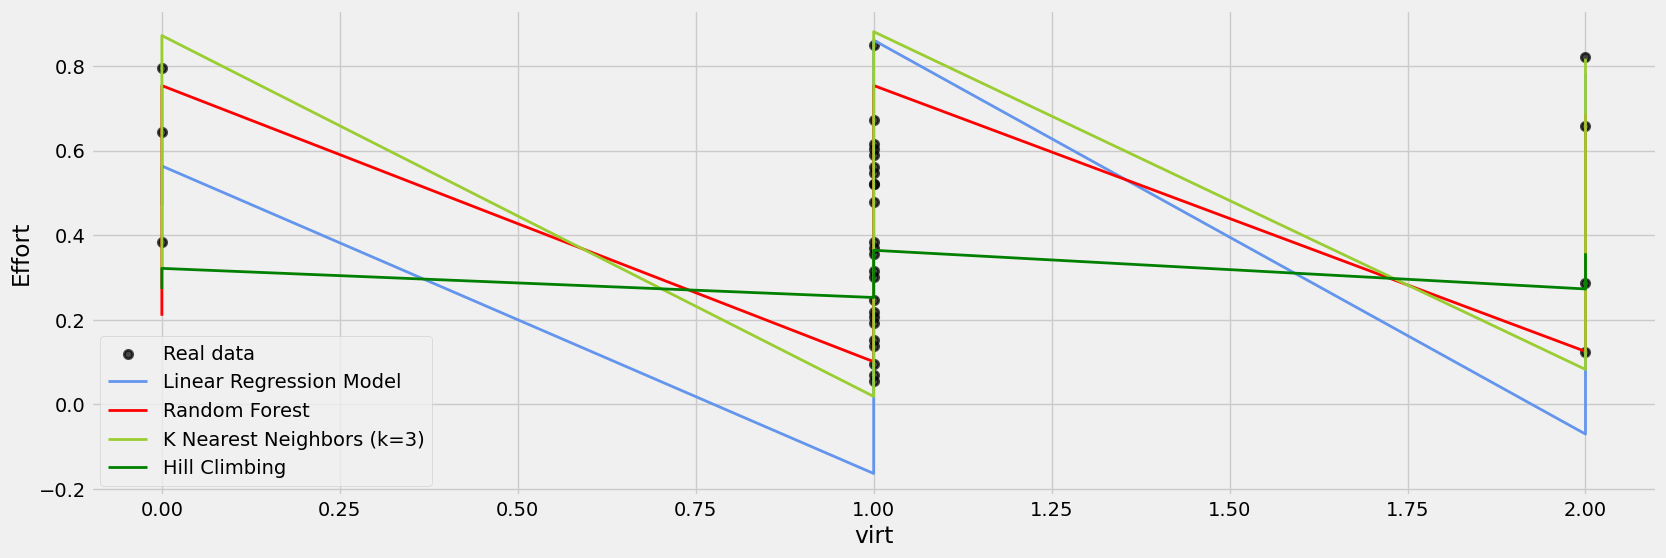

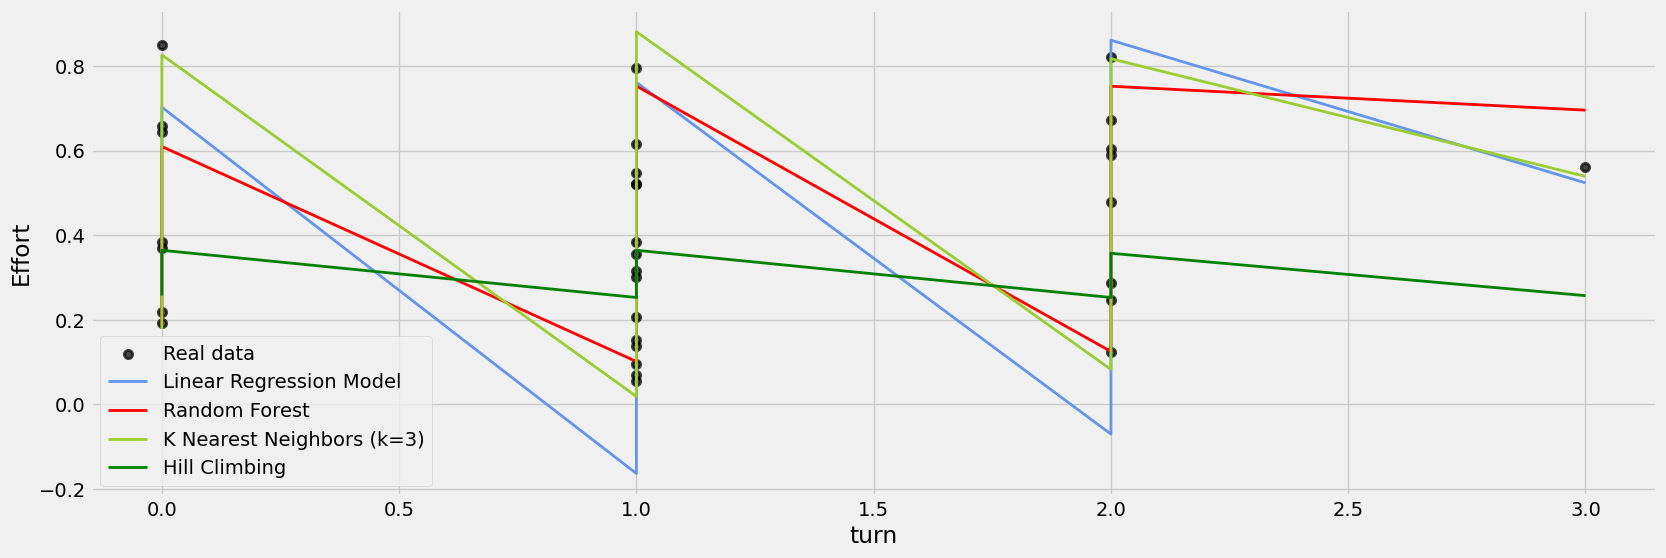

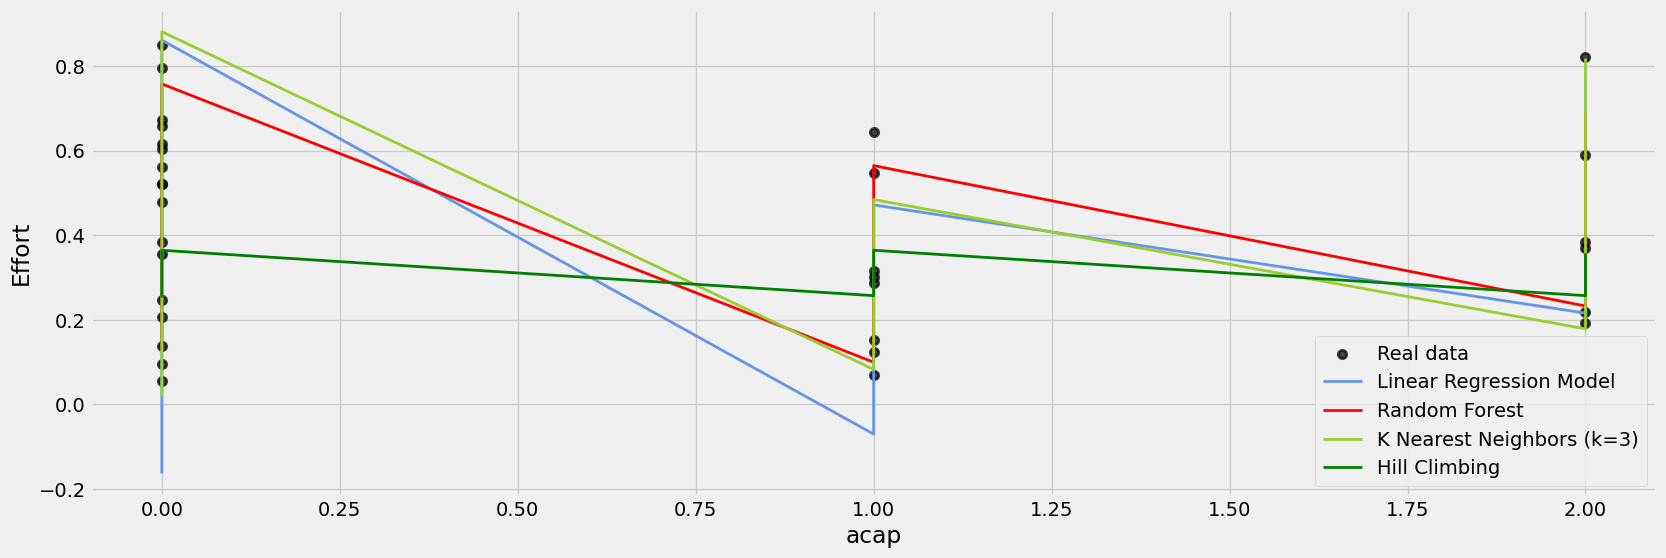

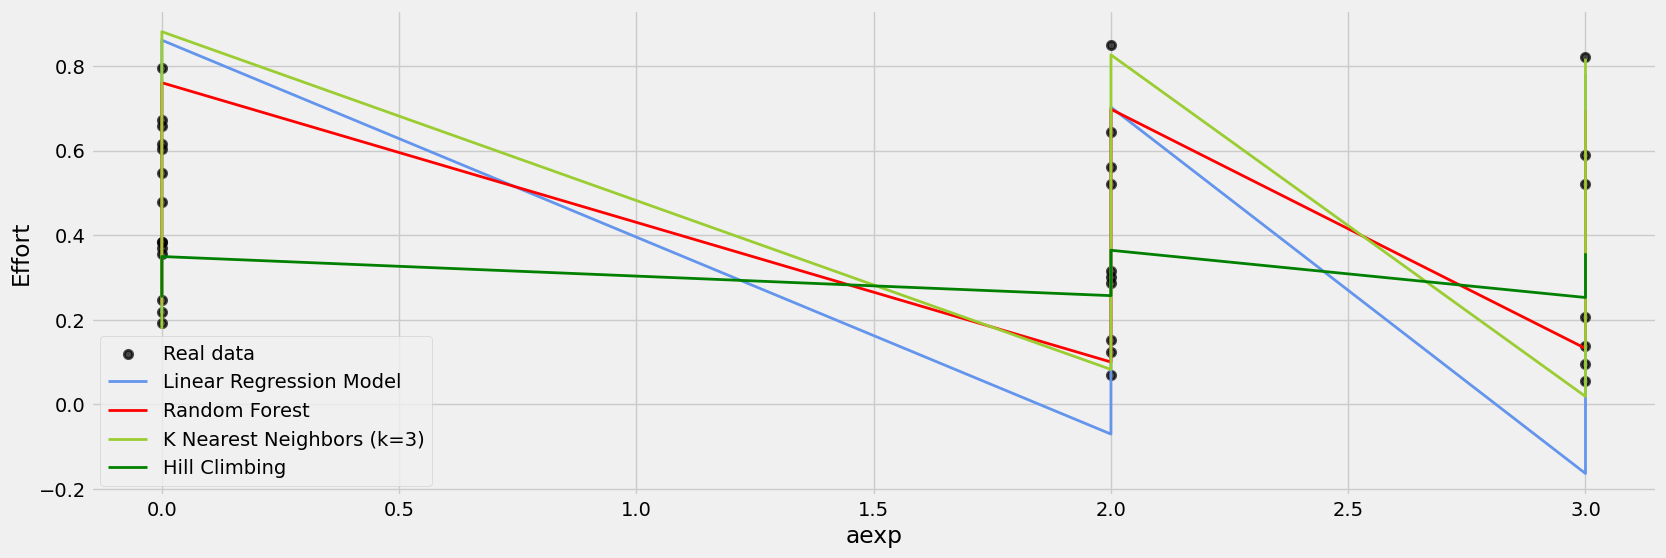

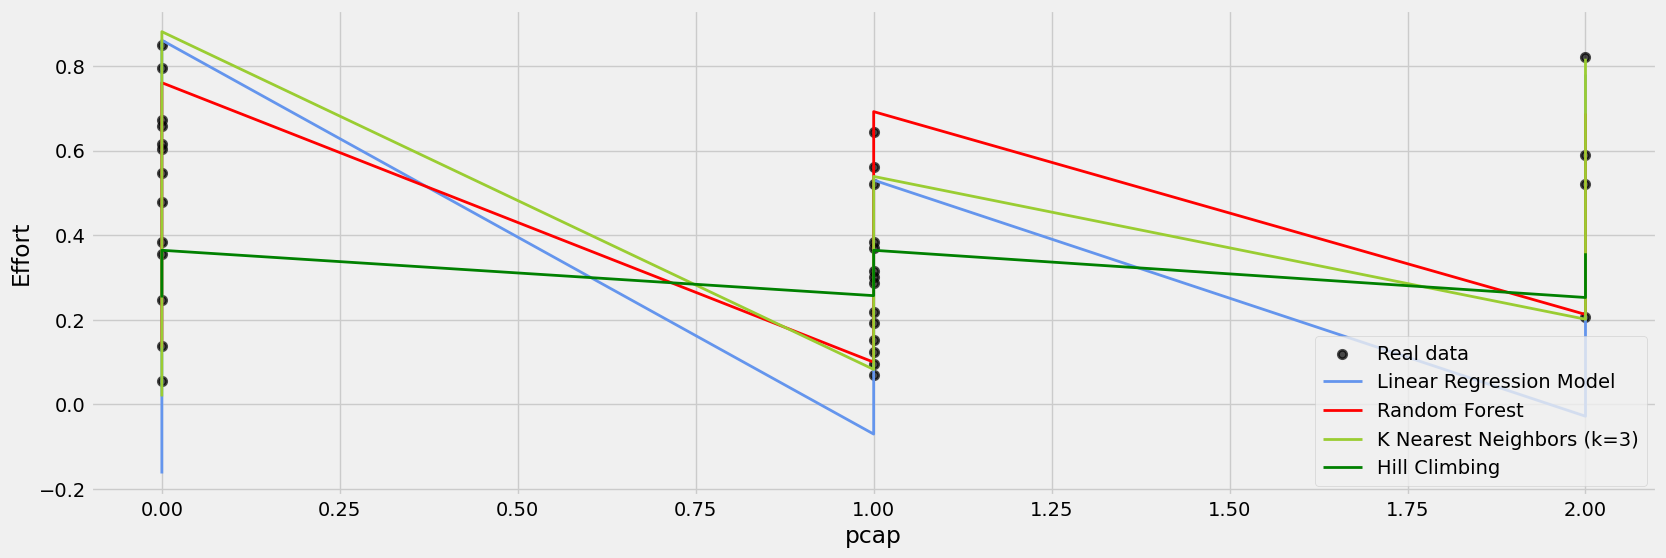

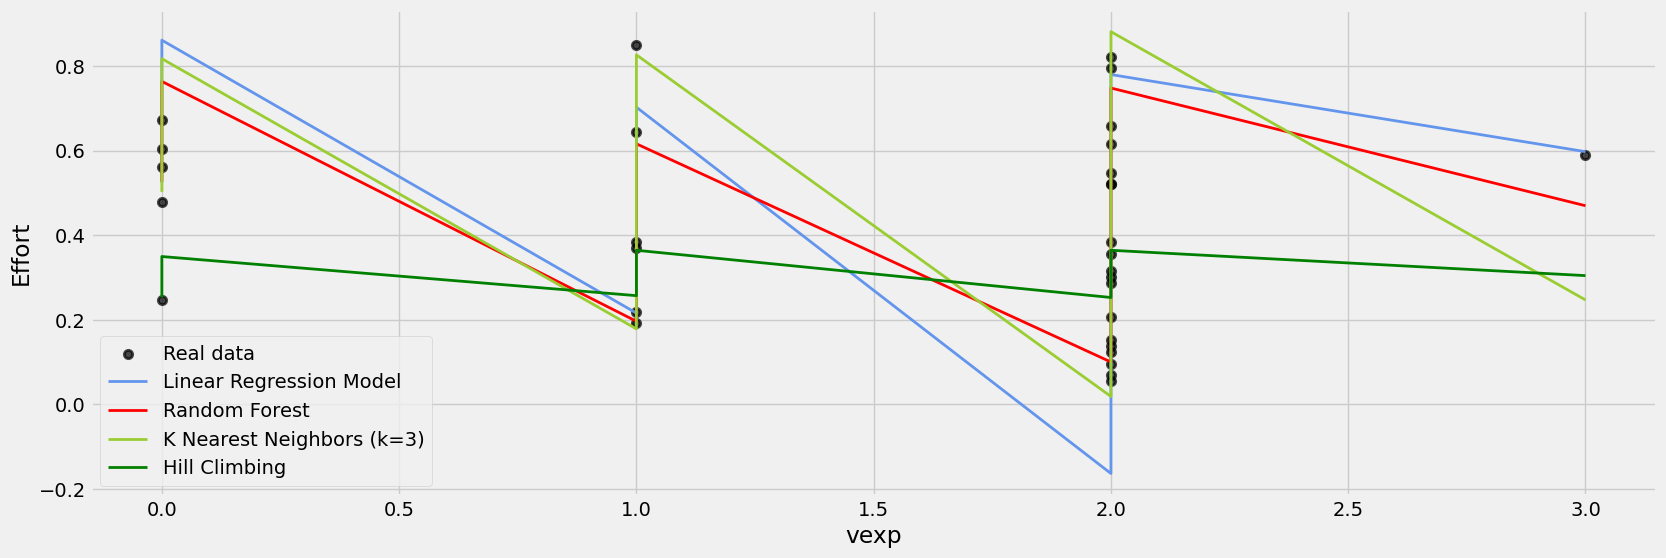

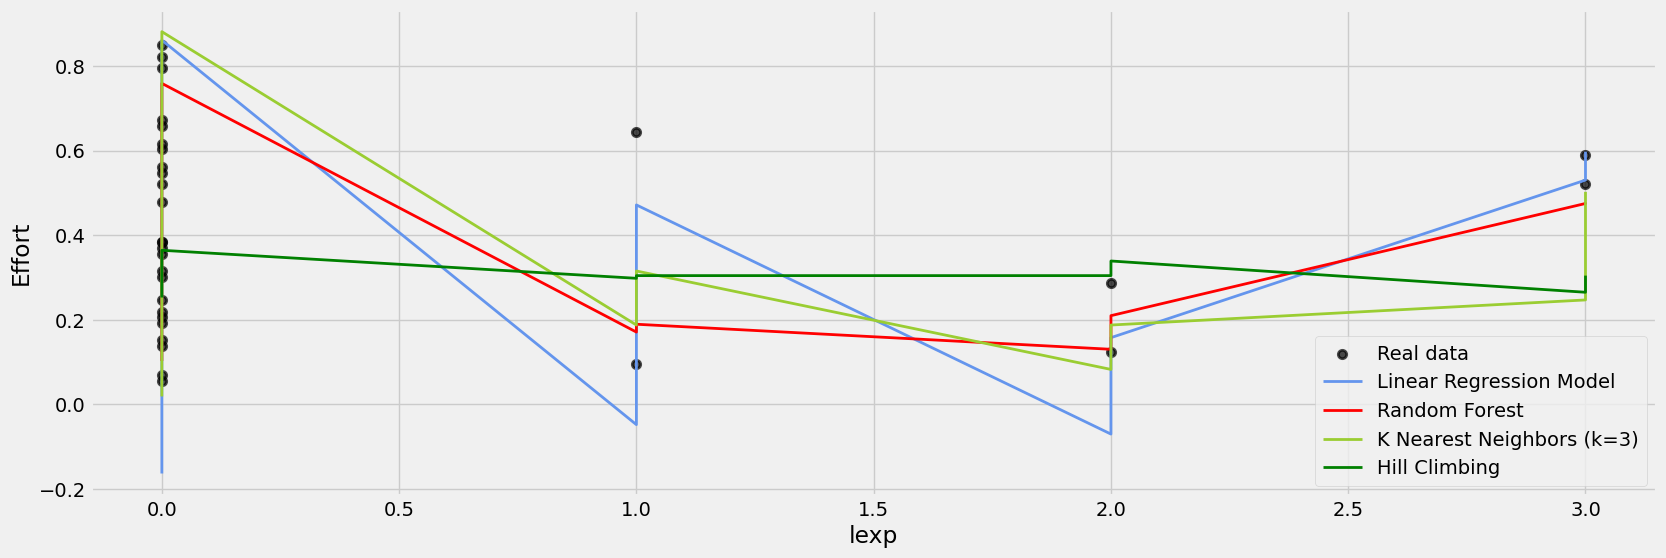

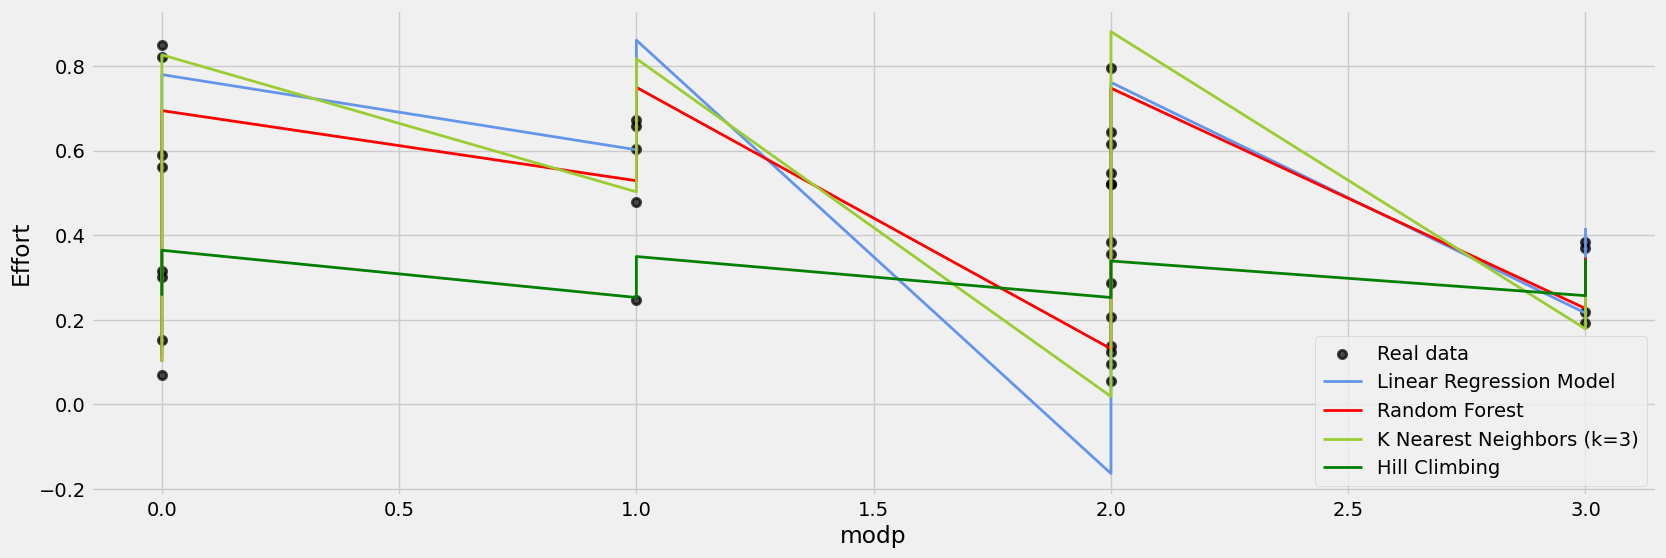

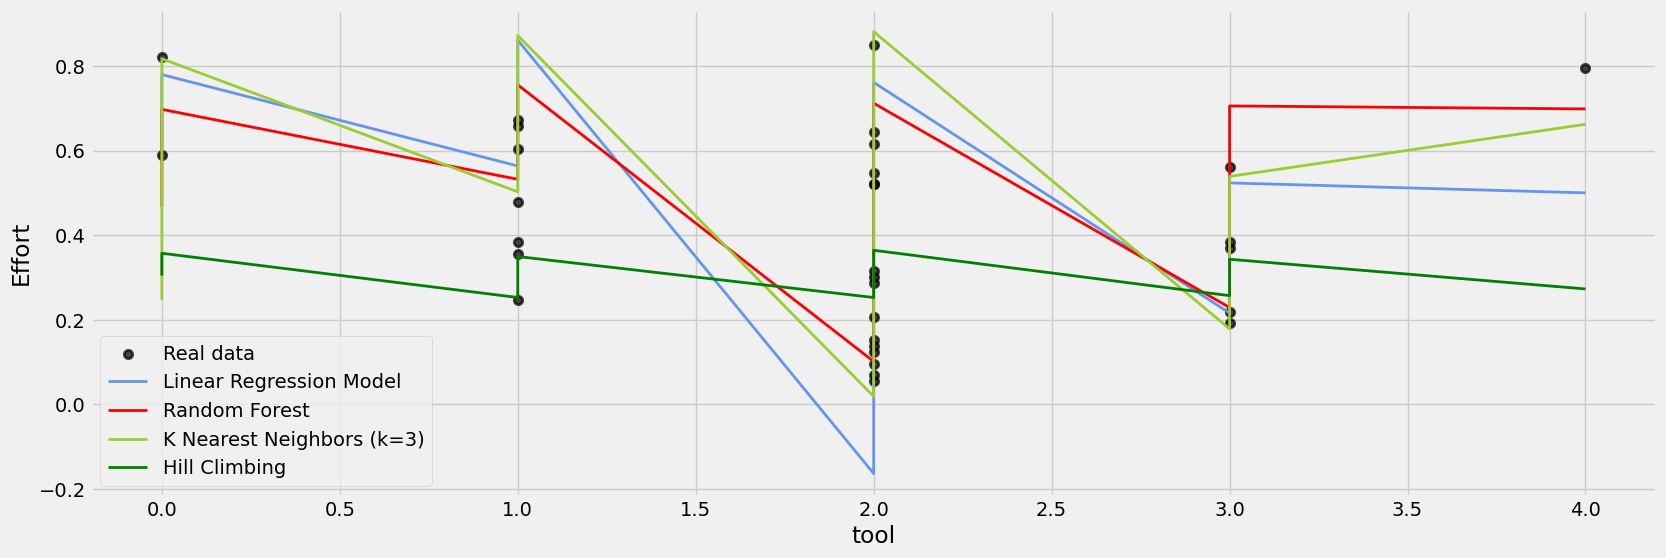

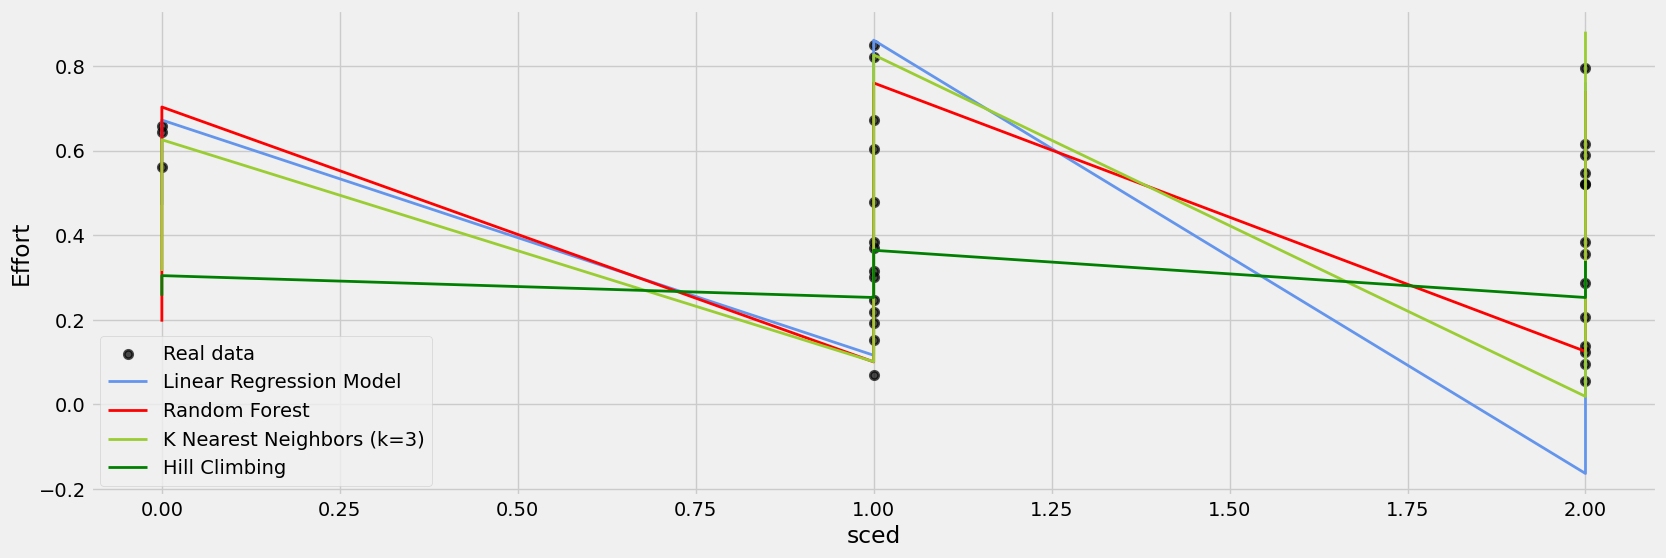

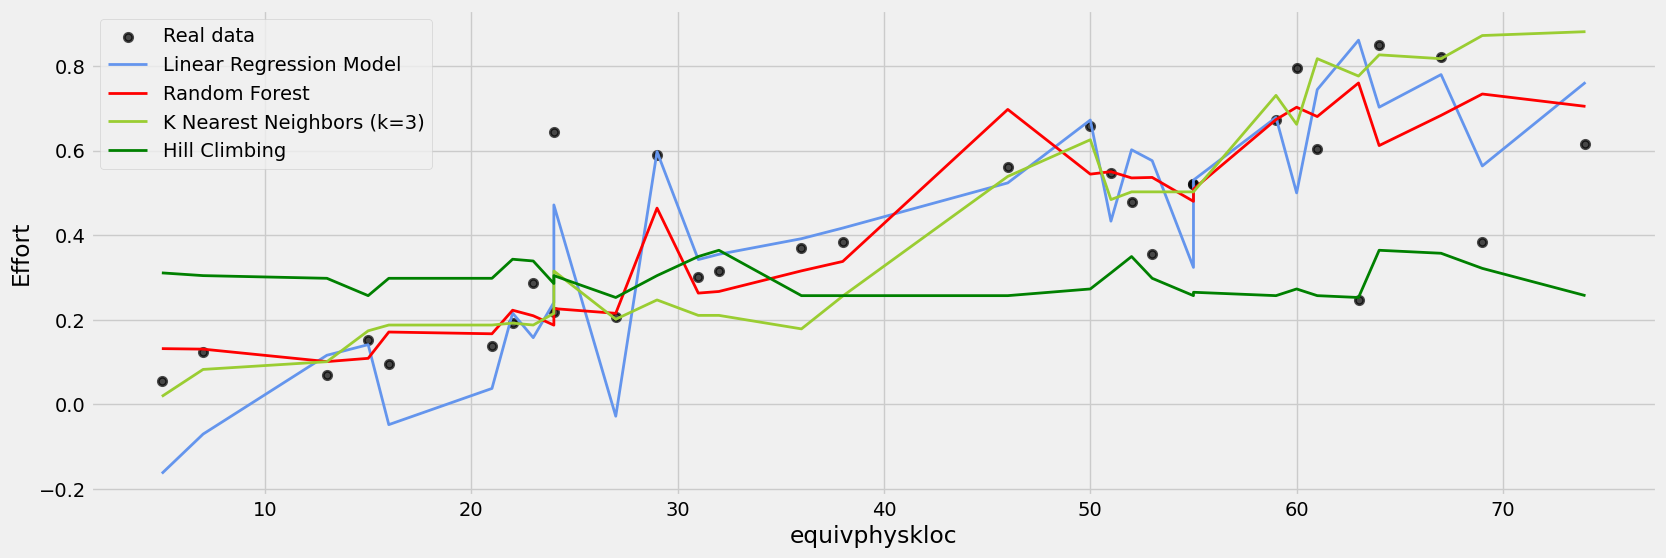

In [ ]:

for i, features in enumerate(X):
    plt.figure(figsize=(18,6))


    # Knn Regression Model
    xs, ys = zip(*sorted(zip(X_test[features], neigh.fit(X_train, y_train).predict(X_test))))

    # Linear Regression Model
    model1_xs, model1_ys = zip(*sorted(zip(X_test[features], regressor.fit(X_train, y_train).predict(X_test))))

    # Random forest
    model2_xs, model2_ys = zip(*sorted(zip(X_test[features], regressor1.fit(X_train, y_train).predict(X_test))))

    # Support Vector Machine
    svc_model_xs, svc_model_ys = zip(*sorted(zip(X_test[features], LinearSVC.fit(X_train, y_train).predict(X_test))))

    # Hill Climbing
    model3_xs, model3_ys = zip(*sorted(zip(X_test[features], scores)))

    plt.scatter(X_test[features], y_test, label='Real data', lw=2,alpha= 0.7, c='k' )
    plt.plot(model1_xs, model1_ys , lw=2, label='Linear Regression Model', c='cornflowerblue')
    plt.plot(model2_xs, model2_ys , lw=2, label='Random Forest', c='Red')
    plt.plot(xs, ys , lw=2,label='K Nearest Neighbors (k=3)', c='yellowgreen')
    plt.plot(model3_xs, model3_ys , lw=2,label='Hill Climbing', c='Green')

    plt.xlabel(features)
    plt.ylabel('Effort')
    plt.legend()
    plt.show()